#                           Retail Prices Of Commodities In India

In [ ]:
In this project we will be working with a dataset which contains the information about retail Prices Of different Commodities
in India from 2001 to 2021.Here we are trying to analyse the price variation of different commodities in India from 2001 to 2021.
Here the data captures as monthly wise across different states and their major centers from past twenty years.

The Monthly_Food_Retail_Prices.csv dataset contains 1147446 observations (rows) and  8 features (columns).

This data set contains the following features(Columns):
    
State: Indian state. Example: Maharashtra, Madhya Pradesh, Rajasthan, etc.
Center: Major Market centers in each state. Example: Mumbai, Pune, Bangalore, etc.
Commodity: Name of the commodity. Example: Fish, Apple, Rice, Bajra, Ghee, etc.
Variety: Subtype of the commodity. Example: Type of apple is Delicious medium size.
Unit: Measurement unit. Example: Kg, Litre, Dozens, etc.
Category: Food or Non Food
Date:Month and year.
Retail price: Retail price of the commodity in rupees.


# 1 Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

In [3]:
py.offline.init_notebook_mode(connected=True)

In [53]:
#!pip install plotly

# 2 Load the Data Set


In [4]:
dff=pd.read_csv("Monthly_Food_Retail_Prices.csv")
dff

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.0
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.0
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.5
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,NaN
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,NaN
...,...,...,...,...,...,...,...,...
1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,NaN
1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,NaN
1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,NaN
1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.0


In [5]:
dff.isnull().sum()

State                0
Centre               0
Commodity         9720
Variety         205578
Unit                 0
Category             0
Date                 0
Retail Price    568921
dtype: int64

# 3 Cleaning the Dataset

In [6]:
comm=dff["Commodity"].unique()

In [7]:
dat=dff["Date"].unique()

In [29]:
for d in dat:
    for c in comm:
        m=dff[(dff["Commodity"]==c)&(dff["Date"]==d)]["Retail Price"].mean()
        a=dff[(dff["Commodity"]==c)&(dff["Date"]==d)].index
        dff.loc[a,"Retail Price"]=dff[(dff["Commodity"]==c)&(dff["Date"]==d)]["Retail Price"].fillna(m)

In [44]:
dff.to_csv("processed1.csv")

In [147]:
df=pd.read_csv("Processed1.csv")

In [148]:
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [149]:
df.isnull().sum()

Unnamed: 0           0
State                0
Centre               0
Commodity         9720
Variety         205578
Unit                 0
Category             0
Date                 0
Retail Price      8215
dtype: int64

In [150]:
df["Commodity"]=df["Commodity"].fillna("Not Available")

In [151]:
df["Variety"]=df["Variety"].fillna("FAQ")

In [152]:
df.isnull().sum()

Unnamed: 0         0
State              0
Centre             0
Commodity          0
Variety            0
Unit               0
Category           0
Date               0
Retail Price    8215
dtype: int64

In [153]:
df[df["Commodity"]=="Not Available"]

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
85,85,West Bengal,Malda,Not Available,Split,Kg.,Food,JAN-2001,26.0
171,171,West Bengal,Malda,Not Available,FAQ,Kg/Litre,Food,JAN-2001,NaN
257,257,West Bengal,Malda,Not Available,FAQ,Kg.,Food,JAN-2001,NaN
343,343,West Bengal,Malda,Not Available,FAQ,Kg.,Food,JAN-2001,NaN
404,404,West Bengal,Asansol,Not Available,FAQ,Kg.,Food,JAN-2001,NaN
...,...,...,...,...,...,...,...,...,...
1146775,1146775,West Bengal,Malda,Not Available,FAQ,Kg/Litre,Food,FEB-2021,95.0
1147024,1147024,West Bengal,Malda,Not Available,FAQ,Kg.,Food,MAR-2021,10.0
1147109,1147109,West Bengal,Malda,Not Available,Powdered Agmark,100gm. Pkt,Food,MAR-2021,25.0
1147195,1147195,West Bengal,Malda,Not Available,Split,Kg.,Food,MAR-2021,110.0


In [154]:
a=df[(df["Retail Price"].isnull())&(df["Commodity"]=="Not Available")].index
a

Int64Index([    171,     257,     343,     404,     745,     916,    1426,
               1512,    1598,    1659,
            ...
            1142641, 1142727, 1142976, 1143061, 1143147, 1143233, 1143482,
            1143567, 1143653, 1143739],
           dtype='int64', length=4939)

In [155]:
df=df.drop(a,axis=0)
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [156]:
df.isnull().sum()

Unnamed: 0         0
State              0
Centre             0
Commodity          0
Variety            0
Unit               0
Category           0
Date               0
Retail Price    3276
dtype: int64

In [157]:
df2=df[df["Retail Price"].isnull()]

In [158]:
df2


,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
304965,304965,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Kg.,Food,JAN-2001,NaN
304966,304966,Andhra Pradesh,Guntur,Apple,Delicious medium size,Kg.,Food,JAN-2001,NaN
304967,304967,Andhra Pradesh,Kurnool,Apple,Delicious medium size,Kg.,Food,JAN-2001,NaN
304968,304968,Andhra Pradesh,Vishakhapatnam,Apple,Delicious medium size,Kg.,Food,JAN-2001,NaN
304969,304969,Arunachal Pradesh,Itanagar,Apple,Delicious medium size,Kg.,Food,JAN-2001,NaN
...,...,...,...,...,...,...,...,...,...
331724,331724,Uttarakhand,Srinagar,Apple,Delicious medium size,Kg.,Food,NOV-2004,NaN
331725,331725,West Bengal,Asansol,Apple,Delicious medium size,Kg.,Food,NOV-2004,NaN
331726,331726,West Bengal,Howrah,Apple,Delicious medium size,Kg.,Food,NOV-2004,NaN
331727,331727,West Bengal,Jalpaiguri,Apple,Delicious medium size,Kg.,Food,NOV-2004,NaN


In [159]:
df2.Commodity.value_counts()


Apple    3276
Name: Commodity, dtype: int64

In [160]:
b=df[(df["Commodity"]=="Apple")&(df["Retail Price"].isnull())].index

In [161]:
b

Int64Index([304965, 304966, 304967, 304968, 304969, 304970, 304971, 304972,
            304973, 304974,
            ...
            331719, 331720, 331721, 331722, 331723, 331724, 331725, 331726,
            331727, 331728],
           dtype='int64', length=3276)

In [162]:
df=df.drop(b,axis=0)

In [163]:
df.isnull().sum()

Unnamed: 0      0
State           0
Centre          0
Commodity       0
Variety         0
Unit            0
Category        0
Date            0
Retail Price    0
dtype: int64

# 4 Which Date has highest price of wheat?

In [21]:
df1=df[df["Commodity"]=="Wheat"]

In [22]:
df1.sort_values(by="Retail Price",ascending=False)

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
1146895,1146895,Tamil Nadu,Coimbatore,Wheat,Kalyan HYV,Kg.,Food,FEB-2021,130.0
1147401,1147401,Tamil Nadu,Coimbatore,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,128.0
1145890,1145890,Tamil Nadu,Tirunelveli,Wheat,Desi,Kg.,Food,DEC-2020,125.0
1146389,1146389,Tamil Nadu,Coimbatore,Wheat,Kalyan HYV,Kg.,Food,JAN-2021,125.0
1146902,1146902,Tamil Nadu,Tirunelveli,Wheat,Desi,Kg.,Food,FEB-2021,125.0
...,...,...,...,...,...,...,...,...,...
1109901,1109901,Kerala,Trivandrum,Wheat,Desi,Kg.,Food,JAN-2015,2.0
1104335,1104335,Kerala,Trivandrum,Wheat,Desi,Kg.,Food,FEB-2014,2.0
1107877,1107877,Kerala,Trivandrum,Wheat,Desi,Kg.,Food,SEP-2014,2.0
1111925,1111925,Kerala,Trivandrum,Wheat,Desi,Kg.,Food,MAY-2015,2.0


At FEB-2021 Coimbatore,Tamil Nadu was the date and place which has the highest price of wheat in this dataset

# 5 Which is the highest price of wheat statewise?

In [23]:
st = []
price = []
state = df1.State.unique()
for s in state:
    maxprice = df1[(df1["State"]==s) & (df1["Commodity"]=="Wheat")]["Retail Price"].max()
    print("Maximum price of wheat in %s : %0.2f"%(s,maxprice))
    st.append(s)
    price.append(maxprice)
    

Maximum price of wheat in Andhra Pradesh : 44.00
Maximum price of wheat in Arunachal Pradesh : 47.00
Maximum price of wheat in Assam : 38.00
Maximum price of wheat in Bihar : 30.00
Maximum price of wheat in Goa : 36.00
Maximum price of wheat in Gujarat : 36.00
Maximum price of wheat in Haryana : 29.68
Maximum price of wheat in Himachal Pradesh : 29.68
Maximum price of wheat in Jammu Kashmir : 29.68
Maximum price of wheat in Jharkhand : 32.00
Maximum price of wheat in Karnataka : 70.00
Maximum price of wheat in Kerala : 44.00
Maximum price of wheat in Madhya Pradesh : 32.00
Maximum price of wheat in Maharashtra : 40.00
Maximum price of wheat in Manipur : 29.68
Maximum price of wheat in Meghalaya : 29.68
Maximum price of wheat in Nagaland : 29.68
Maximum price of wheat in National Capital : 29.68
Maximum price of wheat in Orissa : 36.00
Maximum price of wheat in Punjab : 29.68
Maximum price of wheat in Rajasthan : 30.00
Maximum price of wheat in Sikkim : 30.00
Maximum price of wheat in T

In [24]:
data = {"State":st,"Price":price}

In [25]:
state_price = pd.DataFrame(data)

In [26]:
state_price = state_price.sort_values(by="Price")

In [27]:
state_price

,State,Price
14,Manipur,29.684211
26,Uttar Pradesh,29.684211
25,Union Territories,29.684211
19,Punjab,29.684211
17,National Capital,29.684211
16,Nagaland,29.684211
15,Meghalaya,29.684211
27,Uttarakhand,29.684211
28,West Bengal,29.684211
7,Himachal Pradesh,29.684211


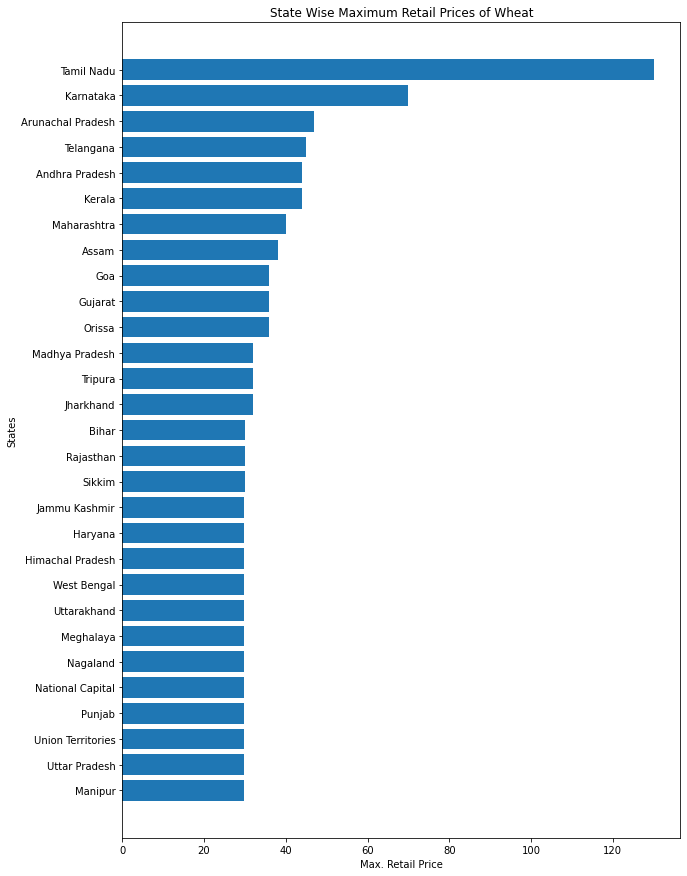

In [28]:
plt.figure(figsize=(10,15))
plt.barh("State","Price",data=state_price)
plt.xlabel("Max. Retail Price")
plt.ylabel("States")
plt.title("State Wise Maximum Retail Prices of Wheat")
plt.show()

# 6 If the Commodity is mustard oil,how many varieties are available in mustard oil?

In [29]:
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [30]:
df[(df["Commodity"]=="Mustard Oil")]["Variety"].unique()


array(['FAQ'], dtype=object)

In [33]:
FAQ is the only variety for Mustard oil in this dataset

# 7 How many varieties are available in each commodity?

In [31]:
comm=df["Commodity"].unique()

In [32]:
for c in comm:
    var=df[df["Commodity"]==c]["Variety"].unique()
    print("%s have %s varities"%(c,var))

Moong have ['Split'] varities
Not Available have ['Split' 'Powdered Agmark' 'FAQ' 'Superfine' 'Packet(iodized)'
 'Delicious medium size' 'Local' 'White' 'Mutton' 'Common' 'Rohu 1Kg Size'
 'Desi' 'Whole' 'Amul/Any Other' 'Poultry' 'Fresh'] varities
Mustard Oil have ['FAQ'] varities
Onion have ['FAQ'] varities
Potato have ['FAQ'] varities
Ragi have ['FAQ'] varities
Red Chillies have ['Powdered Agmark'] varities
Rice have ['Common/Coarse' 'Fine' 'Superfine'] varities
Salt have ['Loose(common)' 'Packet(iodized)'] varities
Sugar have ['FAQ'] varities
Suji have ['FAQ'] varities
Tea have ['Brooke Bond Red Label' 'Ctc(loose)'] varities
Arhar have ['Split'] varities
Atta have ['FAQ'] varities
Bajra have ['FAQ'] varities
Banana have ['FAQ'] varities
Besan have ['FAQ'] varities
Biscuit have ['Glucose'] varities
Apple have ['Delicious medium size'] varities
Groundnut Oil have ['FAQ'] varities
Gur have ['Local'] varities
Jowar have ['White'] varities
Maida have ['FAQ'] varities
Maize have ['FAQ'] v

# 8 What is the pomphret price in kerala from 2001 to 2021?

In [33]:
df3=df[(df["Variety"]=="Pomphret")&(df["State"]=="Kerala")]

In [34]:
df3

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
627505,627505,Kerala,Ernakulam,Fish,Pomphret,Kg.,Food,JAN-2001,58.562500
627508,627508,Kerala,Khozhikode,Fish,Pomphret,Kg.,Food,JAN-2001,58.562500
627511,627511,Kerala,Trivandrum,Fish,Pomphret,Kg.,Food,JAN-2001,58.562500
628308,628308,Kerala,Ernakulam,Fish,Pomphret,Kg.,Food,FEB-2001,58.937500
628311,628311,Kerala,Khozhikode,Fish,Pomphret,Kg.,Food,FEB-2001,58.937500
...,...,...,...,...,...,...,...,...,...
821031,821031,Kerala,Khozhikode,Fish,Pomphret,Kg.,Food,FEB-2021,500.000000
821034,821034,Kerala,Trivandrum,Fish,Pomphret,Kg.,Food,FEB-2021,650.000000
821831,821831,Kerala,Ernakulam,Fish,Pomphret,Kg.,Food,MAR-2021,316.901961
821834,821834,Kerala,Khozhikode,Fish,Pomphret,Kg.,Food,MAR-2021,500.000000


In [35]:
price=[]
date=[]
dat=df3["Date"].unique()
for d in dat:
    avgprice=df3[(df3["Date"]==d)]["Retail Price"].mean()
    print("Average Retail Price of Pomphret in %s:%0.3f" %(d,avgprice))
    price.append(avgprice)
    date.append(d)
    

Average Retail Price of Pomphret in JAN-2001:58.562
Average Retail Price of Pomphret in FEB-2001:58.938
Average Retail Price of Pomphret in MAR-2001:59.676
Average Retail Price of Pomphret in APR-2001:58.387
Average Retail Price of Pomphret in MAY-2001:56.500
Average Retail Price of Pomphret in JUN-2001:56.800
Average Retail Price of Pomphret in JUL-2001:54.750
Average Retail Price of Pomphret in AUG-2001:52.120
Average Retail Price of Pomphret in SEP-2001:53.516
Average Retail Price of Pomphret in OCT-2001:52.261
Average Retail Price of Pomphret in NOV-2001:51.864
Average Retail Price of Pomphret in DEC-2001:57.074
Average Retail Price of Pomphret in JAN-2002:55.138
Average Retail Price of Pomphret in FEB-2002:53.133
Average Retail Price of Pomphret in MAR-2002:52.862
Average Retail Price of Pomphret in APR-2002:53.500
Average Retail Price of Pomphret in MAY-2002:54.636
Average Retail Price of Pomphret in JUN-2002:55.667
Average Retail Price of Pomphret in JUL-2002:54.900
Average Reta

Average Retail Price of Pomphret in JUL-2018:439.165
Average Retail Price of Pomphret in AUG-2018:371.040
Average Retail Price of Pomphret in SEP-2018:374.949
Average Retail Price of Pomphret in OCT-2018:412.578
Average Retail Price of Pomphret in NOV-2018:404.507
Average Retail Price of Pomphret in DEC-2018:473.627
Average Retail Price of Pomphret in JAN-2019:491.489
Average Retail Price of Pomphret in FEB-2019:508.076
Average Retail Price of Pomphret in MAR-2019:506.134
Average Retail Price of Pomphret in APR-2019:525.813
Average Retail Price of Pomphret in MAY-2019:553.189
Average Retail Price of Pomphret in JUN-2019:576.841
Average Retail Price of Pomphret in JUL-2019:509.725
Average Retail Price of Pomphret in AUG-2019:408.582
Average Retail Price of Pomphret in SEP-2019:426.485
Average Retail Price of Pomphret in OCT-2019:426.079
Average Retail Price of Pomphret in NOV-2019:463.014
Average Retail Price of Pomphret in DEC-2019:465.770
Average Retail Price of Pomphret in JAN-2020:4

In [36]:
data = {"Date":date,"Price":price}

In [37]:
Pomphret_price = pd.DataFrame(data)

In [38]:
Pomphret_price

,Date,Price
0,JAN-2001,58.562500
1,FEB-2001,58.937500
2,MAR-2001,59.676471
3,APR-2001,58.387097
4,MAY-2001,56.500000
...,...,...
238,NOV-2020,388.216981
239,DEC-2020,456.611650
240,JAN-2021,467.928349
241,FEB-2021,490.872274


In [39]:

import plotly.express as px
fig = px.bar(Pomphret_price, x = "Date", y = "Price")
fig.show()

# 9 How many states has meat as commodity?

In [40]:
df[df["Commodity"]=="Meat"]["State"].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'National Capital', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Union Territories',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [41]:
df[df["Commodity"]=="Meat"].State.nunique()

30

# 10 How many types of variety of meat?

In [42]:
df[df["Commodity"]=="Meat"]["Variety"].unique()

array(['Mutton'], dtype=object)

In [43]:
df[df["Commodity"]=="Meat"]["Variety"].nunique()

1

# 11 Which Centre has the highest price of rice in Maharashtra?

In [44]:
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [45]:
df_new=df[(df["State"]=="Maharashtra")&(df["Commodity"]=="Rice")]
df_new

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
607,607,Maharashtra,Aurangabad,Rice,Common/Coarse,Kg.,Food,JAN-2001,12.931649
608,608,Maharashtra,Aurangabad,Rice,Fine,Kg.,Food,JAN-2001,12.931649
609,609,Maharashtra,Aurangabad,Rice,Superfine,Kg.,Food,JAN-2001,12.931649
610,610,Maharashtra,Mumbai,Rice,Common/Coarse,Kg.,Food,JAN-2001,12.931649
611,611,Maharashtra,Mumbai,Rice,Fine,Kg.,Food,JAN-2001,12.931649
...,...,...,...,...,...,...,...,...,...
304327,304327,Maharashtra,Nasik,Rice,Fine,Kg.,Food,MAR-2021,47.000000
304328,304328,Maharashtra,Nasik,Rice,Superfine,Kg.,Food,MAR-2021,53.000000
304329,304329,Maharashtra,Pune,Rice,Common/Coarse,Kg.,Food,MAR-2021,35.000000
304330,304330,Maharashtra,Pune,Rice,Fine,Kg.,Food,MAR-2021,44.000000


In [47]:
var=df_new["Variety"].unique()


In [48]:
for v in var:
    max=df_new[(df_new["Variety"]==v)]["Retail Price"].max()
    centre1=df_new[(df_new["Variety"]==v)&(df_new["Retail Price"]==max)]["Centre"].unique()
    date1=df_new[(df_new["Variety"]==v)&(df_new["Retail Price"]==max)]["Date"].unique()
    print("%s centre at %s was the highest price(%0.3f) for rice variety %s in this dataset"%(centre1,date1,max,v))
    

['Aurangabad' 'Nagpur' 'Nasik' 'Pune'] centre at ['JUL-2017'] was the highest price(46.027) for rice variety Common/Coarse in this dataset
['Aurangabad'] centre at ['JUL-2018' 'OCT-2018'] was the highest price(65.000) for rice variety Fine in this dataset
['Aurangabad'] centre at ['FEB-2018'] was the highest price(122.000) for rice variety Superfine in this dataset


# 12 What is the price difference between desi wheat and kalyan HYV state wise?

In [49]:
df8=df[(df["Commodity"]=="Wheat")]
df8

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
1024830,1024830,Andhra Pradesh,Chittoor,Wheat,Desi,Kg.,Food,JAN-2001,13.00000
1024831,1024831,Andhra Pradesh,Chittoor,Wheat,Kalyan HYV,Kg.,Food,JAN-2001,10.00000
1024832,1024832,Andhra Pradesh,Guntur,Wheat,Desi,Kg.,Food,JAN-2001,11.50000
1024833,1024833,Andhra Pradesh,Guntur,Wheat,Kalyan HYV,Kg.,Food,JAN-2001,9.47500
1024834,1024834,Andhra Pradesh,Kurnool,Wheat,Desi,Kg.,Food,JAN-2001,9.47500
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.30198
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.00000


In [50]:
st=df8["State"].unique()
no=[]

for s in st:
    val=df8[(df8["State"]==s)]["Variety"].nunique()
    if val==1:
        no.append(s)

In [51]:
no

['Manipur', 'Meghalaya']

In [52]:
ind1=df8[(df8["State"]=="Manipur")].index

In [53]:
ind1

Int64Index([1024917, 1025423, 1025929, 1026435, 1026941, 1027447, 1027953,
            1028459, 1028965, 1029471,
            ...
            1142815, 1143321, 1143827, 1144333, 1144839, 1145345, 1145851,
            1146357, 1146863, 1147369],
           dtype='int64', length=243)

In [54]:
df8=df8.drop(ind1,axis=0)

In [55]:
ind2=df8[(df8["State"]=="Meghalaya")].index

In [56]:
ind2

Int64Index([1024918, 1025424, 1025930, 1026436, 1026942, 1027448, 1027954,
            1028460, 1028966, 1029472,
            ...
            1142816, 1143322, 1143828, 1144334, 1144840, 1145346, 1145852,
            1146358, 1146864, 1147370],
           dtype='int64', length=243)

In [57]:
df8=df8.drop(ind2,axis=0)

In [58]:
df8

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
1024830,1024830,Andhra Pradesh,Chittoor,Wheat,Desi,Kg.,Food,JAN-2001,13.00000
1024831,1024831,Andhra Pradesh,Chittoor,Wheat,Kalyan HYV,Kg.,Food,JAN-2001,10.00000
1024832,1024832,Andhra Pradesh,Guntur,Wheat,Desi,Kg.,Food,JAN-2001,11.50000
1024833,1024833,Andhra Pradesh,Guntur,Wheat,Kalyan HYV,Kg.,Food,JAN-2001,9.47500
1024834,1024834,Andhra Pradesh,Kurnool,Wheat,Desi,Kg.,Food,JAN-2001,9.47500
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.30198
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.00000


In [59]:
df8['Date'] = pd.DatetimeIndex(df8['Date']).year

In [60]:
df8

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
1024830,1024830,Andhra Pradesh,Chittoor,Wheat,Desi,Kg.,Food,2001,13.00000
1024831,1024831,Andhra Pradesh,Chittoor,Wheat,Kalyan HYV,Kg.,Food,2001,10.00000
1024832,1024832,Andhra Pradesh,Guntur,Wheat,Desi,Kg.,Food,2001,11.50000
1024833,1024833,Andhra Pradesh,Guntur,Wheat,Kalyan HYV,Kg.,Food,2001,9.47500
1024834,1024834,Andhra Pradesh,Kurnool,Wheat,Desi,Kg.,Food,2001,9.47500
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,2021,29.30198
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,2021,29.30198
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,2021,29.30198
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,2021,20.00000


In [61]:
state=df8["State"].unique()
date=df8["Date"].unique()

In [62]:
sta=[]
price=[]
dat=[]
for s in state:
    for d in date:
        
        a=df8[(df8["Commodity"]=="Wheat")&(df8["State"]==s)&(df8["Variety"]=="Desi")&(df8["Date"]==d)]["Retail Price"].mean()
        b=df8[(df8["Commodity"]=="Wheat")&(df8["State"]==s)&(df8["Variety"]=="Kalyan HYV")&(df8["Date"]==d)]["Retail Price"].mean()
        diff=a-b
        if diff>=0:
            print("Retail price difference of wheat variety desi and kalyan in %s at %d was %0.3f"%(s,d,diff))
            sta.append(s)
            price.append(diff)
            dat.append(d)
        else:
            print("Retail price difference of wheat variety desi and kalyan in %s at %d was %0.3f"%(s,d,abs(diff)))
            sta.append(s)
            price.append(abs(diff))
            dat.append(d)
         
        
            
            

Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2001 was 1.341
Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2002 was 1.280
Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2003 was 1.466
Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2004 was 1.139
Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2005 was 0.262
Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2006 was 0.415
Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2007 was 0.660
Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2008 was 1.173
Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2009 was 3.122
Retail price difference of wheat variety desi and kalyan in Andhra Pradesh at 2010 was 4.366
Retail price difference of wheat variety desi and kalyan in Andhra Pra

Retail price difference of wheat variety desi and kalyan in Goa at 2013 was 1.917
Retail price difference of wheat variety desi and kalyan in Goa at 2014 was 1.833
Retail price difference of wheat variety desi and kalyan in Goa at 2015 was 1.667
Retail price difference of wheat variety desi and kalyan in Goa at 2016 was 1.833
Retail price difference of wheat variety desi and kalyan in Goa at 2017 was 2.083
Retail price difference of wheat variety desi and kalyan in Goa at 2018 was 0.000
Retail price difference of wheat variety desi and kalyan in Goa at 2019 was 0.000
Retail price difference of wheat variety desi and kalyan in Goa at 2020 was 4.161
Retail price difference of wheat variety desi and kalyan in Goa at 2021 was 3.354
Retail price difference of wheat variety desi and kalyan in Gujarat at 2001 was 0.132
Retail price difference of wheat variety desi and kalyan in Gujarat at 2002 was 0.287
Retail price difference of wheat variety desi and kalyan in Gujarat at 2003 was 0.142
Reta

Retail price difference of wheat variety desi and kalyan in Jharkhand at 2001 was 1.167
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2002 was 1.467
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2003 was 0.299
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2004 was 0.910
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2005 was 0.761
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2006 was 1.812
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2007 was 1.646
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2008 was 1.792
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2009 was 0.917
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2010 was 0.944
Retail price difference of wheat variety desi and kalyan in Jharkhand at 2011 was 0.738
Retail price difference of wheat

Retail price difference of wheat variety desi and kalyan in Maharashtra at 2015 was 2.500
Retail price difference of wheat variety desi and kalyan in Maharashtra at 2016 was 2.000
Retail price difference of wheat variety desi and kalyan in Maharashtra at 2017 was 2.000
Retail price difference of wheat variety desi and kalyan in Maharashtra at 2018 was 2.710
Retail price difference of wheat variety desi and kalyan in Maharashtra at 2019 was 2.031
Retail price difference of wheat variety desi and kalyan in Maharashtra at 2020 was 1.851
Retail price difference of wheat variety desi and kalyan in Maharashtra at 2021 was 0.137
Retail price difference of wheat variety desi and kalyan in Nagaland at 2001 was 0.000
Retail price difference of wheat variety desi and kalyan in Nagaland at 2002 was 0.000
Retail price difference of wheat variety desi and kalyan in Nagaland at 2003 was 0.000
Retail price difference of wheat variety desi and kalyan in Nagaland at 2004 was 0.000
Retail price differenc

Retail price difference of wheat variety desi and kalyan in Rajasthan at 2006 was 2.392
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2007 was 2.672
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2008 was 2.758
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2009 was 2.915
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2010 was 2.515
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2011 was 2.792
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2012 was 2.612
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2013 was 1.967
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2014 was 2.896
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2015 was 2.950
Retail price difference of wheat variety desi and kalyan in Rajasthan at 2016 was 0.588
Retail price difference of wheat

Retail price difference of wheat variety desi and kalyan in Tripura at 2018 was 0.000
Retail price difference of wheat variety desi and kalyan in Tripura at 2019 was 0.000
Retail price difference of wheat variety desi and kalyan in Tripura at 2020 was 0.000
Retail price difference of wheat variety desi and kalyan in Tripura at 2021 was 0.000
Retail price difference of wheat variety desi and kalyan in Union Territories at 2001 was 0.216
Retail price difference of wheat variety desi and kalyan in Union Territories at 2002 was 0.074
Retail price difference of wheat variety desi and kalyan in Union Territories at 2003 was 0.499
Retail price difference of wheat variety desi and kalyan in Union Territories at 2004 was 0.028
Retail price difference of wheat variety desi and kalyan in Union Territories at 2005 was 0.674
Retail price difference of wheat variety desi and kalyan in Union Territories at 2006 was 0.082
Retail price difference of wheat variety desi and kalyan in Union Territories at

In [63]:
data = {"State":sta,"Date":dat,"Price Difference":price}

In [64]:
price_diff=pd.DataFrame(data)

In [65]:
price_diff

,State,Date,Price Difference
0,Andhra Pradesh,2001,1.341342
1,Andhra Pradesh,2002,1.280123
2,Andhra Pradesh,2003,1.465540
3,Andhra Pradesh,2004,1.139036
4,Andhra Pradesh,2005,0.261967
...,...,...,...
562,West Bengal,2017,0.395424
563,West Bengal,2018,0.533688
564,West Bengal,2019,0.250000
565,West Bengal,2020,0.853014


In [66]:
import plotly.express as px
  

fig = px.bar(price_diff, x="Date", y="Price Difference", 
             color="State", barmode = 'group')
  
fig.show()

#                          Highest and lowest price difference year wise

In [67]:
one=price_diff["Date"].unique()


In [68]:
for d in one:
    max=price_diff[(price_diff["Date"]==d)]["Price Difference"].max()
    state=price_diff[(price_diff["Date"]==d)&(price_diff["Price Difference"]==max)]["State"].unique()
    min=price_diff[(price_diff["Date"]==d)]["Price Difference"].min()
    state1=price_diff[(price_diff["Date"]==d)&(price_diff["Price Difference"]==min)]["State"].unique()
    
    
    print("highest price difference in %s was::%0.3f state::%s"%(d,max,state))
    print("lowest price difference in %s was::%0.3f state::%s"%(d,min,state1))

highest price difference in 2001 was::5.151 state::['Kerala']
lowest price difference in 2001 was::0.000 state::['Arunachal Pradesh' 'Assam' 'Jammu Kashmir' 'Nagaland' 'Sikkim' 'Tripura']
highest price difference in 2002 was::4.544 state::['Kerala']
lowest price difference in 2002 was::0.000 state::['Arunachal Pradesh' 'Nagaland' 'Sikkim' 'Tripura']
highest price difference in 2003 was::6.280 state::['Telangana']
lowest price difference in 2003 was::0.000 state::['Arunachal Pradesh' 'Assam' 'Jammu Kashmir' 'Nagaland' 'Sikkim' 'Tripura'
 'Uttarakhand']
highest price difference in 2004 was::7.833 state::['Telangana']
lowest price difference in 2004 was::0.000 state::['Arunachal Pradesh' 'Assam' 'Nagaland' 'Sikkim' 'Tripura' 'Uttarakhand']
highest price difference in 2005 was::7.417 state::['Telangana']
lowest price difference in 2005 was::0.000 state::['Arunachal Pradesh' 'Assam' 'Sikkim' 'Tripura']
highest price difference in 2006 was::6.007 state::['Telangana']
lowest price difference 

# 13 How many variety of coffee is available and what is their price differences(Year Wise )?

In [69]:
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [70]:
df[(df["Commodity"]=="Coffee")]["Variety"].unique()

array(['Instant', 'Powdered'], dtype=object)

In [71]:
#year wise  price difference

In [71]:
df9=df[(df["Commodity"]=="Coffee")]
df9

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
822990,822990,Andhra Pradesh,Chittoor,Coffee,Instant,500gm. Pkt,Food,JAN-2001,137.375000
822991,822991,Andhra Pradesh,Chittoor,Coffee,Powdered,Kg.,Food,JAN-2001,140.000000
822992,822992,Andhra Pradesh,Guntur,Coffee,Instant,500gm. Pkt,Food,JAN-2001,137.375000
822993,822993,Andhra Pradesh,Guntur,Coffee,Powdered,Kg.,Food,JAN-2001,137.375000
822994,822994,Andhra Pradesh,Kurnool,Coffee,Instant,500gm. Pkt,Food,JAN-2001,137.375000
...,...,...,...,...,...,...,...,...,...
1024483,1024483,West Bengal,Jalpaiguri,Coffee,Powdered,Kg.,Food,MAR-2021,1095.829268
1024484,1024484,West Bengal,Kolkata,Coffee,Instant,500gm. Pkt,Food,MAR-2021,135.000000
1024485,1024485,West Bengal,Kolkata,Coffee,Powdered,Kg.,Food,MAR-2021,1095.829268
1024486,1024486,West Bengal,Malda,Coffee,Instant,500gm. Pkt,Food,MAR-2021,1095.829268


In [72]:
df9['Date'] = pd.DatetimeIndex(df9['Date']).year

<ipython-input-72-dd983c96d42b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df9

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
822990,822990,Andhra Pradesh,Chittoor,Coffee,Instant,500gm. Pkt,Food,2001,137.375000
822991,822991,Andhra Pradesh,Chittoor,Coffee,Powdered,Kg.,Food,2001,140.000000
822992,822992,Andhra Pradesh,Guntur,Coffee,Instant,500gm. Pkt,Food,2001,137.375000
822993,822993,Andhra Pradesh,Guntur,Coffee,Powdered,Kg.,Food,2001,137.375000
822994,822994,Andhra Pradesh,Kurnool,Coffee,Instant,500gm. Pkt,Food,2001,137.375000
...,...,...,...,...,...,...,...,...,...
1024483,1024483,West Bengal,Jalpaiguri,Coffee,Powdered,Kg.,Food,2021,1095.829268
1024484,1024484,West Bengal,Kolkata,Coffee,Instant,500gm. Pkt,Food,2021,135.000000
1024485,1024485,West Bengal,Kolkata,Coffee,Powdered,Kg.,Food,2021,1095.829268
1024486,1024486,West Bengal,Malda,Coffee,Instant,500gm. Pkt,Food,2021,1095.829268


In [74]:
date=df9["Date"].unique()

In [75]:
year=[]
price=[]
for d in date:
    a=df9[(df9["Commodity"]=="Coffee")&(df9["Variety"]=="Instant")&(df9["Date"]==d)]["Retail Price"].mean()
    b=df9[(df9["Commodity"]=="Coffee")&(df9["Variety"]=="Powdered")&(df9["Date"]==d)]["Retail Price"].mean()
    diff=a-b
    if diff>=0:
        #diff=("%0.2f"%(diff))
        
        print("Retail price difference of coffee variety Instant and Powdered in %d was %f"%(d,diff))
        year.append(d)
        price.append(diff)
        
    else:
        print("Retail price difference of coffee variety Instant and Powdered in %d was %0.3f"%(d,abs(diff)))
        year.append(d)
        price.append(abs(diff))
        
    

Retail price difference of coffee variety Instant and Powdered in 2001 was 0.000
Retail price difference of coffee variety Instant and Powdered in 2002 was 0.758098
Retail price difference of coffee variety Instant and Powdered in 2003 was 0.000000
Retail price difference of coffee variety Instant and Powdered in 2004 was 0.887323
Retail price difference of coffee variety Instant and Powdered in 2005 was 15.859812
Retail price difference of coffee variety Instant and Powdered in 2006 was 3.495
Retail price difference of coffee variety Instant and Powdered in 2007 was 3.692376
Retail price difference of coffee variety Instant and Powdered in 2008 was 14.458
Retail price difference of coffee variety Instant and Powdered in 2009 was 28.127
Retail price difference of coffee variety Instant and Powdered in 2010 was 7.969
Retail price difference of coffee variety Instant and Powdered in 2011 was 10.887051
Retail price difference of coffee variety Instant and Powdered in 2012 was 1.647521
Ret

In [76]:


pr = []

for i in range(len(price)):
    p = float(("%0.2f"%(price[i])))
    pr.append(p)

In [77]:
data1 = {"Year":year,"Price":pr}

In [78]:
price_dif=pd.DataFrame(data1)

In [79]:
price_dif

,Year,Price
0,2001,0.00
1,2002,0.76
2,2003,0.00
3,2004,0.89
4,2005,15.86
5,2006,3.49
6,2007,3.69
7,2008,14.46
8,2009,28.13
9,2010,7.97


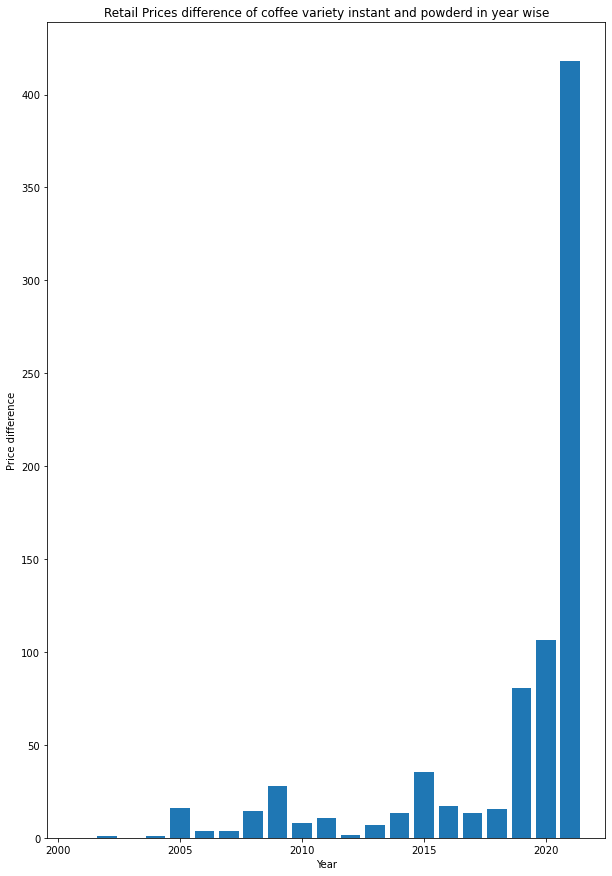

In [80]:
plt.figure(figsize=(10,15))
plt.bar("Year","Price",data=price_dif)
plt.xlabel("Year")
plt.ylabel("Price difference")
plt.title("Retail Prices difference of coffee variety instant and powderd in year wise")
plt.show()

# 14 What are the varieties of fish available in the market from 2001 to 2010?

In [81]:
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [82]:
df10=df

In [83]:
df10['Date'] = pd.DatetimeIndex(df10['Date']).year

In [84]:
fish=df10[(df10["Commodity"]=="Fish")&(df10["Date"]>=2001)&(df10["Date"]<=2010)]["Variety"].unique()
print("varities of fish available between 2001 and 2010 is:%s"%(fish))

varities of fish available between 2001 and 2010 is:['Cat Fish' 'Pomphret' 'Rohu 1Kg Size']


# 15 Which state has lowest price of Bajra according to yearwise?

In [109]:
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [110]:
df11=df[(df["Commodity"]=="Bajra")]

In [111]:
df11

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
305220,305220,Andhra Pradesh,Chittoor,Bajra,FAQ,Kg.,Food,JAN-2001,6.500000
305221,305221,Andhra Pradesh,Guntur,Bajra,FAQ,Kg.,Food,JAN-2001,6.820000
305222,305222,Andhra Pradesh,Kurnool,Bajra,FAQ,Kg.,Food,JAN-2001,5.000000
305223,305223,Andhra Pradesh,Vishakhapatnam,Bajra,FAQ,Kg.,Food,JAN-2001,6.820000
305224,305224,Assam,Dispur,Bajra,FAQ,Kg.,Food,JAN-2001,6.820000
...,...,...,...,...,...,...,...,...,...
445644,445644,Uttar Pradesh,Saharanpur,Bajra,FAQ,Kg.,Food,MAR-2021,25.615385
445645,445645,Uttarakhand,Haldwani,Bajra,FAQ,Kg.,Food,MAR-2021,25.615385
445646,445646,Uttarakhand,Srinagar,Bajra,FAQ,Kg.,Food,MAR-2021,25.615385
445647,445647,West Bengal,Asansol,Bajra,FAQ,Kg.,Food,MAR-2021,22.000000


In [112]:
df11['Date'] = pd.DatetimeIndex(df11['Date']).year

<ipython-input-112-6c81e3b729fd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
df11

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
305220,305220,Andhra Pradesh,Chittoor,Bajra,FAQ,Kg.,Food,2001,6.500000
305221,305221,Andhra Pradesh,Guntur,Bajra,FAQ,Kg.,Food,2001,6.820000
305222,305222,Andhra Pradesh,Kurnool,Bajra,FAQ,Kg.,Food,2001,5.000000
305223,305223,Andhra Pradesh,Vishakhapatnam,Bajra,FAQ,Kg.,Food,2001,6.820000
305224,305224,Assam,Dispur,Bajra,FAQ,Kg.,Food,2001,6.820000
...,...,...,...,...,...,...,...,...,...
445644,445644,Uttar Pradesh,Saharanpur,Bajra,FAQ,Kg.,Food,2021,25.615385
445645,445645,Uttarakhand,Haldwani,Bajra,FAQ,Kg.,Food,2021,25.615385
445646,445646,Uttarakhand,Srinagar,Bajra,FAQ,Kg.,Food,2021,25.615385
445647,445647,West Bengal,Asansol,Bajra,FAQ,Kg.,Food,2021,22.000000


In [114]:
dat=df11["Date"].unique()

In [115]:
pri=[]
stat=[]
year=[]
for d in dat:
    price=df11[(df11["Date"]==d)]["Retail Price"].min()
    sta=df11[(df11["Date"]==d)&(df11["Commodity"]=="Bajra")&(df11["Retail Price"]==price)]["State"].unique()
    
    
    print("Minimum price of bajra in %d:: state::%s price:: %0.3f"%(d,sta,price))
    pri.append(price)
    stat.append(sta)
    year.append(d)
    

Minimum price of bajra in 2001:: state::['Uttar Pradesh'] price:: 3.500
Minimum price of bajra in 2002:: state::['Madhya Pradesh'] price:: 4.000
Minimum price of bajra in 2003:: state::['Rajasthan'] price:: 4.500
Minimum price of bajra in 2004:: state::['Rajasthan'] price:: 4.000
Minimum price of bajra in 2005:: state::['Karnataka'] price:: 5.500
Minimum price of bajra in 2006:: state::['Bihar' 'Orissa' 'Karnataka' 'Rajasthan'] price:: 6.000
Minimum price of bajra in 2007:: state::['Rajasthan'] price:: 6.000
Minimum price of bajra in 2008:: state::['Rajasthan'] price:: 6.000
Minimum price of bajra in 2009:: state::['Uttar Pradesh'] price:: 7.500
Minimum price of bajra in 2010:: state::['Uttar Pradesh'] price:: 8.000
Minimum price of bajra in 2011:: state::['Rajasthan'] price:: 8.500
Minimum price of bajra in 2012:: state::['Rajasthan' 'Uttar Pradesh'] price:: 10.000
Minimum price of bajra in 2013:: state::['Punjab' 'Rajasthan'] price:: 12.000
Minimum price of bajra in 2014:: state::['P

In [116]:
state = []
for i in stat:
    state.append(i[0])

In [117]:
state[5] = "Bihar, Orissa, Karnataka, Rajathan"
state[11] = "Rajasthan, Uttar Pradesh"
state[12] = "Panjab Rajshthan"
state[13] = "Panjab Rajshthan"
state[15] = "Haryana, Rajasthan"

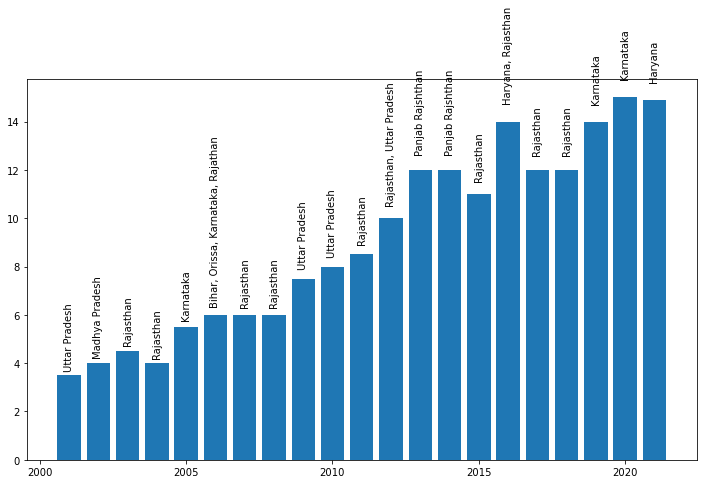

In [118]:
plt.figure(figsize = (12,7))
bar_plot =  plt.bar(year,pri)


def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                state[idx],
                ha='center', va='bottom', rotation=90)

autolabel(bar_plot)


plt.show()

# 16 How many types of oils are available and their varieties?

In [119]:
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [121]:
df["Commodity"].unique()

array(['Moong', 'Not Available', 'Mustard Oil', 'Onion', 'Potato', 'Ragi',
       'Red Chillies', 'Rice', 'Salt', 'Sugar', 'Suji', 'Tea', 'Arhar',
       'Atta', 'Bajra', 'Banana', 'Besan', 'Biscuit', 'Apple',
       'Groundnut Oil', 'Gur', 'Jowar', 'Maida', 'Maize', 'Masur', 'Meat',
       'Milk', 'Coriander', 'Cummin Seed', 'Eggs', 'Fish', 'Ghee',
       'Gingelly Oil', 'Gram', 'Black Pepper', 'Bread', 'Brinjal',
       'Butter', 'Chicken', 'Coconut', 'Coconut Oil', 'Coffee', 'Tomato',
       'Turmeric', 'Urad', 'Vanaspati', 'Wheat'], dtype=object)

In [122]:
df["Variety"].unique()

array(['Split', 'FAQ', 'Powdered Agmark', 'Common/Coarse', 'Fine',
       'Superfine', 'Loose(common)', 'Packet(iodized)',
       'Brooke Bond Red Label', 'Ctc(loose)', 'Glucose',
       'Delicious medium size', 'Local', 'White', 'Mutton', 'Cow/Buffalo',
       'Dairy', 'Common', 'Cat Fish', 'Pomphret', 'Rohu 1Kg Size', 'Desi',
       'Whole', 'Amul/Any Other', 'Poultry', 'Dry', 'Fresh', 'Instant',
       'Powdered', 'Kalyan HYV'], dtype=object)

In [123]:
df[df["Commodity"]=="Mustard Oil"]["Variety"].unique()

array(['FAQ'], dtype=object)

In [124]:
df[df["Commodity"]=="Groundnut Oil"]["Variety"].unique()

array(['FAQ'], dtype=object)

In [125]:
df[df["Commodity"]=="Gingelly Oil"]["Variety"].unique()

array(['FAQ'], dtype=object)

In [126]:
df[df["Commodity"]=="Coconut Oil"]["Variety"].unique()

array(['FAQ'], dtype=object)

# 17 Which state consume more local products commodity wise?[in variety field]

In [128]:
df16=df[(df["Variety"]=="Local")]

In [129]:
df16

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
445989,445989,Andhra Pradesh,Chittoor,Gur,Local,Kg.,Food,JAN-2001,1200.000000
445990,445990,Andhra Pradesh,Guntur,Gur,Local,Kg.,Food,JAN-2001,12.000000
445991,445991,Andhra Pradesh,Kurnool,Gur,Local,Kg.,Food,JAN-2001,13.000000
445992,445992,Andhra Pradesh,Vishakhapatnam,Gur,Local,Kg.,Food,JAN-2001,63.989796
445993,445993,Arunachal Pradesh,Itanagar,Gur,Local,Kg.,Food,JAN-2001,63.989796
...,...,...,...,...,...,...,...,...,...
1023821,1023821,West Bengal,Asansol,Bread,Local,400/800 Gm,Food,MAR-2021,16.000000
1023822,1023822,West Bengal,Howrah,Bread,Local,400/800 Gm,Food,MAR-2021,24.000000
1023823,1023823,West Bengal,Jalpaiguri,Bread,Local,400/800 Gm,Food,MAR-2021,30.016949
1023824,1023824,West Bengal,Kolkata,Bread,Local,400/800 Gm,Food,MAR-2021,21.000000


In [130]:
x=df16["State"].unique()

In [131]:

for s in x:
    l=df16[(df16["State"]==s)]["Commodity"].unique()
    n=df16[(df16["State"]==s)]["Commodity"].nunique()
    
    print(" %s consumes %s (%d)local varieties"%(s,l,n))

 Andhra Pradesh consumes ['Gur' 'Bread'] (2)local varieties
 Arunachal Pradesh consumes ['Gur' 'Bread'] (2)local varieties
 Assam consumes ['Gur' 'Bread'] (2)local varieties
 Bihar consumes ['Gur' 'Bread'] (2)local varieties
 Goa consumes ['Gur' 'Bread'] (2)local varieties
 Gujarat consumes ['Gur' 'Bread'] (2)local varieties
 Haryana consumes ['Gur' 'Bread'] (2)local varieties
 Himachal Pradesh consumes ['Gur' 'Bread'] (2)local varieties
 Jammu Kashmir consumes ['Gur' 'Bread'] (2)local varieties
 Jharkhand consumes ['Gur' 'Bread'] (2)local varieties
 Karnataka consumes ['Gur' 'Bread'] (2)local varieties
 Kerala consumes ['Gur' 'Bread'] (2)local varieties
 Madhya Pradesh consumes ['Gur' 'Bread'] (2)local varieties
 Maharashtra consumes ['Gur' 'Bread'] (2)local varieties
 Manipur consumes ['Gur' 'Bread'] (2)local varieties
 Meghalaya consumes ['Gur' 'Bread'] (2)local varieties
 Mizoram consumes ['Gur' 'Bread'] (2)local varieties
 Nagaland consumes ['Gur' 'Bread'] (2)local varieties
 Nati

# 18 Top 5 Commodities which have high retail price in 2021

In [132]:
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [133]:
df17=df

In [134]:
df17['Date'] = pd.DatetimeIndex(df17['Date']).year

In [135]:
comm=df17["Commodity"].unique()

In [136]:
com=[]
high_retail_price=[]
for c in comm:
    top=df17[(df17["Date"]==2021)&(df17["Commodity"]==c)]["Retail Price"].mean()
    print("Average retail price of %s in 2021:%0.3f"%(c,top))
    com.append(c)
    high_retail_price.append(top)

Average retail price of Moong in 2021:107.471
Average retail price of Not Available in 2021:125.590
Average retail price of Mustard Oil in 2021:149.522
Average retail price of Onion in 2021:44.624
Average retail price of Potato in 2021:19.608
Average retail price of Ragi in 2021:40.824
Average retail price of Red Chillies in 2021:29.126
Average retail price of Rice in 2021:50.919
Average retail price of Salt in 2021:15.657
Average retail price of Sugar in 2021:38.834
Average retail price of Suji in 2021:39.481
Average retail price of Tea in 2021:196.620
Average retail price of Arhar in 2021:104.758
Average retail price of Atta in 2021:30.692
Average retail price of Bajra in 2021:25.770
Average retail price of Banana in 2021:44.051
Average retail price of Besan in 2021:83.668
Average retail price of Biscuit in 2021:8.661
Average retail price of Apple in 2021:135.870
Average retail price of Groundnut Oil in 2021:172.820
Average retail price of Gur in 2021:50.115
Average retail price of J

In [137]:
dat= {"Commodity":com,"Retail Price":high_retail_price}

In [138]:
top_retail_price=pd.DataFrame(dat)

In [139]:
top_retail_price=top_retail_price.sort_values(by="Retail Price",ascending=False)
top_retail_price

,Commodity,Retail Price
41,Coffee,1027.019581
34,Black Pepper,637.789193
25,Meat,629.453448
31,Ghee,534.854153
30,Fish,321.101277
40,Coconut Oil,285.932574
28,Cummin Seed,236.186303
32,Gingelly Oil,216.863585
11,Tea,196.620087
38,Chicken,174.449436


In [140]:
five=top_retail_price.head(5)
five

,Commodity,Retail Price
41,Coffee,1027.019581
34,Black Pepper,637.789193
25,Meat,629.453448
31,Ghee,534.854153
30,Fish,321.101277


<AxesSubplot:xlabel='Commodity'>

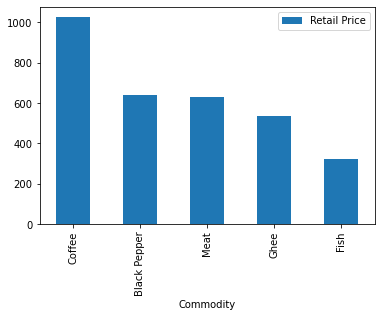

In [141]:
five.plot.bar(x='Commodity', y='Retail Price')

# 18 Top Commodity which have high retail price from 2001 to 2021

In [164]:
df

,Unnamed: 0,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.000000
1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.000000
2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.500000
3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.319444
4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.319444
...,...,...,...,...,...,...,...,...,...
1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.301980
1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.301980
1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.000000


In [165]:
df18=df

In [166]:
df18['Date'] = pd.DatetimeIndex(df18['Date']).year

In [167]:
d=df18["Date"].unique()
d

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [168]:
for y in d:
    max=df18[df18["Date"]==y]["Retail Price"].max()
    comm=df18[(df18["Date"]==y)&(df18["Retail Price"]==max)]["Commodity"].unique()
    print("top commodity in %s is::%s::price::%0.3f"%(y,comm,max))

top commodity in 2001 is::['Gur']::price::1300.000
top commodity in 2002 is::['Coffee']::price::540.000
top commodity in 2003 is::['Meat']::price::902.000
top commodity in 2004 is::['Vanaspati']::price::5300.000
top commodity in 2005 is::['Coffee']::price::1100.000
top commodity in 2006 is::['Meat']::price::4120.000
top commodity in 2007 is::['Coffee']::price::1500.000
top commodity in 2008 is::['Coffee']::price::1700.000
top commodity in 2009 is::['Coffee']::price::1850.000
top commodity in 2010 is::['Chicken']::price::8400.000
top commodity in 2011 is::['Cummin Seed']::price::20045.000
top commodity in 2012 is::['Coffee']::price::2800.000
top commodity in 2013 is::['Coffee']::price::8200.000
top commodity in 2014 is::['Coffee']::price::3200.000
top commodity in 2015 is::['Gram']::price::4550.000
top commodity in 2016 is::['Coffee']::price::9285.000
top commodity in 2017 is::['Coffee']::price::2800.000
top commodity in 2018 is::['Coffee']::price::1900.000
top commodity in 2019 is::['C

# Conclusion

In [ ]:
1. Dataset contains past twenty years of data(from 2001 to 2021)
2. At FEB-2021 Coimbatore,Tamil Nadu was the date and place which has highest price of wheat in this dataset
3. When we analysing the maximun retail price of wheat from 2001 to 2021 in state wise we can see that Tamil Nadu is the state
   which costs the high retail price for wheat in this dataset
4. The pomphret price of kerala in 2021 March was eight times higher than the price in Jan 2001
5. According to this dataset we can see that meat is a commodity in every states including Union Territories.here meat have 
   only one variety that is Mutton.
6. When we analysing the rice price of different centers in Maharashtra according to variety  
   ->Aurangabad,Nagpur,Nasik,Pune centers at Jul-2017 was the highest price(46.027) of rice variety "common/coarse" 
    in this data set
   ->Aurangabad centre at Jul-2018 and oct-2018 was the highest price(65.0)of rice variety "Fine" in this dataset.
   ->Aurangabad centre at Feb-2018 was the highest price(122.00)for rice variety "super fine" in this dataset
7. When we check the state wise and year wise price difference of Desi wheat and Kalyan HYV 
   ->Highest price difference in 2001 was 5.15 and state was kerala
   ->Arunachal pradesh,Assam,Jammu Kashmir,Nagaland,Sikkim,Tripura these states dosen't have any price difference in 2001
   ->Highest price difference in 2021 was 12.33 and state is Telangana
   ->In 2021 Arunachal pradesh,Himachal Pradesh,Jammu Kashmir,Nagaland,Sikkim,Tripura,Union Territories,Uttarakhand 
     dosen't show any price differences
8. There are two coffee variety instant and powdered,in 2001 the price difference was zero and in 2021 difference is 417.958
9. According to this dataset varities of fish available in market between 2001 and 2010 is cat fish,pomphret,rohu 1 kg size.
10.In 2001 U.P has lowest price of bajra that is 3.50
   In 2021 Haryana has lowest price and that is 14.90
11.Main types of oils are Mustard oil,Groundnut oil,Gingelly oil and coconut oil
12.West Bengal is the state which consumes more local products according to commodity wise.
   bread and gur are the commodities which mainly have local varieties.
13.Top five commodity which have high retail price in 2021 is coffee,black pepper,meat,ghee,fish
14.When we check the top commodity according  to price wise from 2001 to 2021 we can see that coffee price is higher than other
   commodities in most of the years. 
